This script demos the calling of consensus ChIP seq peaks obtained from mouse chondrocyte tissue using consensusSeekeR
(https://www.bioconductor.org/packages/release/bioc/html/consensusSeekeR.html)

In [1]:
##loading required packages
library(readr)
library(GenomicRanges)
library(rtracklayer)
library(dplyr)
library(consensusSeekeR)

Loading required package: stats4

Loading required package: BiocGenerics

Loading required package: parallel


Attaching package: 'BiocGenerics'


The following objects are masked from 'package:parallel':

    clusterApply, clusterApplyLB, clusterCall, clusterEvalQ,
    clusterExport, clusterMap, parApply, parCapply, parLapply,
    parLapplyLB, parRapply, parSapply, parSapplyLB


The following objects are masked from 'package:stats':

    IQR, mad, sd, var, xtabs


The following objects are masked from 'package:base':

    anyDuplicated, append, as.data.frame, basename, cbind, colnames,
    dirname, do.call, duplicated, eval, evalq, Filter, Find, get, grep,
    grepl, intersect, is.unsorted, lapply, Map, mapply, match, mget,
    order, paste, pmax, pmax.int, pmin, pmin.int, Position, rank,
    rbind, Reduce, rownames, sapply, setdiff, sort, table, tapply,
    union, unique, unsplit, which.max, which.min


Loading required package: S4Vectors


Attaching package: 'S4Vectors'


The follow

In [2]:
##setting working directory
setwd('D:/mouse_chondrocyte_chip_seq_macs2')

In [3]:
dir <- file.path("D:", "mouse_chondrocyte_chip_seq_macs2")

In [4]:
##importing a list csv file containing a list of narrowPeak files generated 
####from ChIP seq peak calling with MACS2
chondrocyte_narrowPeak_files <- read.csv("chondrocyte_narrowPeak_files.csv", header = FALSE)
##assign column name(s) to chondrocyte_narrowPeak_files
colnames(chondrocyte_narrowPeak_files) <- "chondrocyte_narrowPeak_filenames"

In [5]:
chondrocyte_narrowPeak_files

chondrocyte_narrowPeak_filenames
<chr>
chondrocyte1_l001_peaks.narrowPeak
chondrocyte1_l002_peaks.narrowPeak
chondrocyte2_l001_peaks.narrowPeak
chondrocyte2_l002_peaks.narrowPeak


In [6]:
##importing the narrowPeak files obtained from peak calling with MACS2
chondrocyte1_L001_narrowPeak <- readNarrowPeakFile(paste0(dir, "/", chondrocyte_narrowPeak_files[1,1]), extractRegions = TRUE, extractPeaks = TRUE)
chondrocyte1_L002_narrowPeak <- readNarrowPeakFile(paste0(dir, "/", chondrocyte_narrowPeak_files[2,1]), extractRegions = TRUE, extractPeaks = TRUE)
chondrocyte2_L001_narrowPeak <- readNarrowPeakFile(paste0(dir, "/", chondrocyte_narrowPeak_files[3,1]), extractRegions = TRUE, extractPeaks = TRUE)
chondrocyte2_L002_narrowPeak <- readNarrowPeakFile(paste0(dir, "/", chondrocyte_narrowPeak_files[4,1]), extractRegions = TRUE, extractPeaks = TRUE)

In [7]:
##taking a look at what a narrowPeak file looks like
##the first 6 columns of a narrowPeak file are essentially BED
##the last 4 columns of a narrowPeak file provides signalValue (overall enrichment of a region),
####statistical significance of the called peak (p and q values) and
####peak (the point source called for a peak)
chondrocyte1_L001_narrowPeak

$narrowPeak
GRanges object with 8557 ranges and 6 metadata columns:
         seqnames              ranges strand |                   name     score
            <Rle>           <IRanges>  <Rle> |            <character> <numeric>
     [1]     chr1     4785390-4785626      * | chondrocyte1_l001_pe..        59
     [2]     chr1     4857778-4858295      * | chondrocyte1_l001_pe..        39
     [3]     chr1     4858686-4859084      * | chondrocyte1_l001_pe..        71
     [4]     chr1     5082633-5082857      * | chondrocyte1_l001_pe..        31
     [5]     chr1     5083174-5083522      * | chondrocyte1_l001_pe..        54
     ...      ...                 ...    ... .                    ...       ...
  [8553]     chrX 157334998-157335222      * | chondrocyte1_l001_pe..        31
  [8554]     chrX 162888059-162888324      * | chondrocyte1_l001_pe..        41
  [8555]     chrX 166440186-166440618      * | chondrocyte1_l001_pe..        82
  [8556]     chrX 166440733-166441075      * | chond

In [8]:
##converting the narrowPeak files into data frames
chondrocyte1_L001_narrowPeak_df <- data.frame(chondrocyte1_L001_narrowPeak[["narrowPeak"]])
chondrocyte1_L002_narrowPeak_df <- data.frame(chondrocyte1_L002_narrowPeak[["narrowPeak"]])
chondrocyte2_L001_narrowPeak_df <- data.frame(chondrocyte2_L001_narrowPeak[["narrowPeak"]])
chondrocyte2_L002_narrowPeak_df <- data.frame(chondrocyte2_L002_narrowPeak[["narrowPeak"]])

In [9]:
##it is more easy to see the contents of a narrowPeak file when in data frame format
##here we use the head function to view the first 5 rows
head(chondrocyte1_L001_narrowPeak_df, n=5)

,seqnames,start,end,width,strand,name,score,signalValue,pValue,qValue,peak
,<fct>,<int>,<int>,<int>,<fct>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
1,chr1,4785390,4785626,237,*,chondrocyte1_l001_peak_1,59,6.40382,9.73237,5.93972,147
2,chr1,4857778,4858295,518,*,chondrocyte1_l001_peak_2,39,4.73112,7.34371,3.95221,116
3,chr1,4858686,4859084,399,*,chondrocyte1_l001_peak_3,71,7.09338,11.16308,7.12892,179
4,chr1,5082633,5082857,225,*,chondrocyte1_l001_peak_4,31,4.80287,6.42685,3.17928,186
5,chr1,5083174,5083522,349,*,chondrocyte1_l001_peak_5,54,5.45899,9.18844,5.45396,168


In [10]:
##extracting peak locations from narrowPeak files and storing into data frames
chondrocyte1_L001_peak_df <- data.frame(chondrocyte1_L001_narrowPeak[["peak"]])
chondrocyte1_L002_peak_df <- data.frame(chondrocyte1_L002_narrowPeak[["peak"]])
chondrocyte2_L001_peak_df <- data.frame(chondrocyte2_L001_narrowPeak[["peak"]])
chondrocyte2_L002_peak_df <- data.frame(chondrocyte2_L002_narrowPeak[["peak"]])

In [11]:
##the difference between chondrocyte1_L001_narrowPeak_df and chondrocyte1_L001_peak_df
####is that the peak width in chondrocyte1_L001_peak_df is 1
head(chondrocyte1_L001_peak_df, n=5)

,seqnames,start,end,width,strand,name,score,signalValue,pValue,qValue,peak
,<fct>,<int>,<int>,<int>,<fct>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
1,chr1,4785537,4785537,1,*,chondrocyte1_l001_peak_1,59,6.40382,9.73237,5.93972,147
2,chr1,4857894,4857894,1,*,chondrocyte1_l001_peak_2,39,4.73112,7.34371,3.95221,116
3,chr1,4858865,4858865,1,*,chondrocyte1_l001_peak_3,71,7.09338,11.16308,7.12892,179
4,chr1,5082819,5082819,1,*,chondrocyte1_l001_peak_4,31,4.80287,6.42685,3.17928,186
5,chr1,5083342,5083342,1,*,chondrocyte1_l001_peak_5,54,5.45899,9.18844,5.45396,168


In [12]:
names(chondrocyte1_L001_narrowPeak[["narrowPeak"]]) <- rep("chondrocyte1_L001", length(chondrocyte1_L001_narrowPeak[["narrowPeak"]]))
names(chondrocyte1_L001_narrowPeak[["peak"]]) <- rep("chondrocyte1_L001", length(chondrocyte1_L001_narrowPeak[["peak"]]))
names(chondrocyte1_L002_narrowPeak[["narrowPeak"]]) <- rep("chondrocyte1_L002", length(chondrocyte1_L002_narrowPeak[["narrowPeak"]]))
names(chondrocyte1_L002_narrowPeak[["peak"]]) <- rep("chondrocyte1_L002", length(chondrocyte1_L002_narrowPeak[["peak"]]))
names(chondrocyte2_L001_narrowPeak[["narrowPeak"]]) <- rep("chondrocyte2_L001", length(chondrocyte2_L001_narrowPeak[["narrowPeak"]]))
names(chondrocyte2_L001_narrowPeak[["peak"]]) <- rep("chondrocyte2_L001", length(chondrocyte2_L001_narrowPeak[["peak"]]))
names(chondrocyte2_L002_narrowPeak[["narrowPeak"]]) <- rep("chondrocyte2_L002", length(chondrocyte2_L002_narrowPeak[["narrowPeak"]]))
names(chondrocyte2_L002_narrowPeak[["peak"]]) <- rep("chondrocyte2_L002", length(chondrocyte2_L002_narrowPeak[["peak"]]))

In [13]:
##notice that now the sample names have been included
head(chondrocyte1_L001_narrowPeak[["narrowPeak"]], n=5)

GRanges object with 5 ranges and 6 metadata columns:
                    seqnames          ranges strand |                   name
                       <Rle>       <IRanges>  <Rle> |            <character>
  chondrocyte1_L001     chr1 4785390-4785626      * | chondrocyte1_l001_pe..
  chondrocyte1_L001     chr1 4857778-4858295      * | chondrocyte1_l001_pe..
  chondrocyte1_L001     chr1 4858686-4859084      * | chondrocyte1_l001_pe..
  chondrocyte1_L001     chr1 5082633-5082857      * | chondrocyte1_l001_pe..
  chondrocyte1_L001     chr1 5083174-5083522      * | chondrocyte1_l001_pe..
                        score signalValue    pValue    qValue      peak
                    <numeric>   <numeric> <numeric> <numeric> <integer>
  chondrocyte1_L001        59     6.40382   9.73237   5.93972       147
  chondrocyte1_L001        39     4.73112   7.34371   3.95221       116
  chondrocyte1_L001        71     7.09338  11.16308   7.12892       179
  chondrocyte1_L001        31     4.80287   6.42

In [14]:
##sets reference genome to mm10, which was used for sequence read alignment
mm10info <- Seqinfo(genome="mm10")

In [15]:
##the lines below will find consensus peaks in the replicates

##different values of extendingSize are tested to find the one which optimal
####The extendingSize indicates the size of padding on both sides of the position
####of the peaks median to create the consensus region. The minimum size of the
####consensus region is equal to twice the value of the extendingSize parameter.

##an importan parameter is minNbrExp, which indicate the minimum number of
####experiments in which at least one peak must be present for a potential consensus
####region (in this case, there are 4 replicates, so we can consider consensus
####if a peak shows up in 3 of the 4 replicates - thus minNbrExp=3)

In [16]:
## consensus peaks - extendingSize = 1
chondrocyte_consensus_extend1 <- findConsensusPeakRegions(
  narrowPeaks = c(chondrocyte1_L001_narrowPeak[["narrowPeak"]], 
                  chondrocyte1_L002_narrowPeak[["narrowPeak"]], 
                  chondrocyte2_L001_narrowPeak[["narrowPeak"]], 
                  chondrocyte2_L002_narrowPeak[["narrowPeak"]]),
  peaks = c(chondrocyte1_L001_narrowPeak[["peak"]],
            chondrocyte1_L002_narrowPeak[["peak"]],
            chondrocyte2_L001_narrowPeak[["peak"]],
            chondrocyte2_L002_narrowPeak[["peak"]]), chrInfo = mm10info, extendingSize = 1, 
  expandToFitPeakRegion = FALSE, shrinkToFitPeakRegion = FALSE, minNbrExp = 3, nbrThreads = 1)

In [17]:
## consensus peaks - extendingSize = 10
chondrocyte_consensus_extend10 <- findConsensusPeakRegions(
  narrowPeaks = c(chondrocyte1_L001_narrowPeak[["narrowPeak"]], 
                  chondrocyte1_L002_narrowPeak[["narrowPeak"]], 
                  chondrocyte2_L001_narrowPeak[["narrowPeak"]], 
                  chondrocyte2_L002_narrowPeak[["narrowPeak"]]),
  peaks = c(chondrocyte1_L001_narrowPeak[["peak"]],
            chondrocyte1_L002_narrowPeak[["peak"]],
            chondrocyte2_L001_narrowPeak[["peak"]],
            chondrocyte2_L002_narrowPeak[["peak"]]), chrInfo = mm10info, extendingSize = 10, 
  expandToFitPeakRegion = FALSE, shrinkToFitPeakRegion = FALSE, minNbrExp = 3, nbrThreads = 1)

In [18]:
## consensus peaks - extendingSize = 50
chondrocyte_consensus_extend50 <- findConsensusPeakRegions(
  narrowPeaks = c(chondrocyte1_L001_narrowPeak[["narrowPeak"]], 
                  chondrocyte1_L002_narrowPeak[["narrowPeak"]], 
                  chondrocyte2_L001_narrowPeak[["narrowPeak"]], 
                  chondrocyte2_L002_narrowPeak[["narrowPeak"]]),
  peaks = c(chondrocyte1_L001_narrowPeak[["peak"]],
            chondrocyte1_L002_narrowPeak[["peak"]],
            chondrocyte2_L001_narrowPeak[["peak"]],
            chondrocyte2_L002_narrowPeak[["peak"]]), chrInfo = mm10info, extendingSize = 50, 
  expandToFitPeakRegion = FALSE, shrinkToFitPeakRegion = FALSE, minNbrExp = 3, nbrThreads = 1)

In [19]:
## consensus peaks - extendingSize = 100
chondrocyte_consensus_extend100 <- findConsensusPeakRegions(
  narrowPeaks = c(chondrocyte1_L001_narrowPeak[["narrowPeak"]], 
                  chondrocyte1_L002_narrowPeak[["narrowPeak"]], 
                  chondrocyte2_L001_narrowPeak[["narrowPeak"]], 
                  chondrocyte2_L002_narrowPeak[["narrowPeak"]]),
  peaks = c(chondrocyte1_L001_narrowPeak[["peak"]],
            chondrocyte1_L002_narrowPeak[["peak"]],
            chondrocyte2_L001_narrowPeak[["peak"]],
            chondrocyte2_L002_narrowPeak[["peak"]]), chrInfo = mm10info, extendingSize = 100, 
  expandToFitPeakRegion = FALSE, shrinkToFitPeakRegion = FALSE, minNbrExp = 3, nbrThreads = 1)

In [20]:
## consensus peaks - extendingSize = 300
chondrocyte_consensus_extend300 <- findConsensusPeakRegions(
  narrowPeaks = c(chondrocyte1_L001_narrowPeak[["narrowPeak"]], 
                  chondrocyte1_L002_narrowPeak[["narrowPeak"]], 
                  chondrocyte2_L001_narrowPeak[["narrowPeak"]], 
                  chondrocyte2_L002_narrowPeak[["narrowPeak"]]),
  peaks = c(chondrocyte1_L001_narrowPeak[["peak"]],
            chondrocyte1_L002_narrowPeak[["peak"]],
            chondrocyte2_L001_narrowPeak[["peak"]],
            chondrocyte2_L002_narrowPeak[["peak"]]), chrInfo = mm10info, extendingSize = 300, 
            expandToFitPeakRegion = FALSE, shrinkToFitPeakRegion = FALSE, minNbrExp = 3, nbrThreads = 1)

In [21]:
## consensus peaks - extendingSize = 500
chondrocyte_consensus_extend500 <- findConsensusPeakRegions(
  narrowPeaks = c(chondrocyte1_L001_narrowPeak[["narrowPeak"]], 
                  chondrocyte1_L002_narrowPeak[["narrowPeak"]], 
                  chondrocyte2_L001_narrowPeak[["narrowPeak"]], 
                  chondrocyte2_L002_narrowPeak[["narrowPeak"]]),
  peaks = c(chondrocyte1_L001_narrowPeak[["peak"]],
            chondrocyte1_L002_narrowPeak[["peak"]],
            chondrocyte2_L001_narrowPeak[["peak"]],
            chondrocyte2_L002_narrowPeak[["peak"]]), chrInfo = mm10info, extendingSize = 500, 
  expandToFitPeakRegion = FALSE, shrinkToFitPeakRegion = FALSE, minNbrExp = 3, nbrThreads = 1)

In [22]:
## consensus peaks - extendingSize = 575
chondrocyte_consensus_extend575 <- findConsensusPeakRegions(
  narrowPeaks = c(chondrocyte1_L001_narrowPeak[["narrowPeak"]], 
                  chondrocyte1_L002_narrowPeak[["narrowPeak"]], 
                  chondrocyte2_L001_narrowPeak[["narrowPeak"]], 
                  chondrocyte2_L002_narrowPeak[["narrowPeak"]]),
  peaks = c(chondrocyte1_L001_narrowPeak[["peak"]],
            chondrocyte1_L002_narrowPeak[["peak"]],
            chondrocyte2_L001_narrowPeak[["peak"]],
            chondrocyte2_L002_narrowPeak[["peak"]]), chrInfo = mm10info, extendingSize = 575, 
  expandToFitPeakRegion = FALSE, shrinkToFitPeakRegion = FALSE, minNbrExp = 3, nbrThreads = 1)

In [23]:
## consensus peaks - extendingSize = 600
chondrocyte_consensus_extend600 <- findConsensusPeakRegions(
  narrowPeaks = c(chondrocyte1_L001_narrowPeak[["narrowPeak"]], 
                  chondrocyte1_L002_narrowPeak[["narrowPeak"]], 
                  chondrocyte2_L001_narrowPeak[["narrowPeak"]], 
                  chondrocyte2_L002_narrowPeak[["narrowPeak"]]),
  peaks = c(chondrocyte1_L001_narrowPeak[["peak"]],
            chondrocyte1_L002_narrowPeak[["peak"]],
            chondrocyte2_L001_narrowPeak[["peak"]],
            chondrocyte2_L002_narrowPeak[["peak"]]), chrInfo = mm10info, extendingSize = 600, 
  expandToFitPeakRegion = FALSE, shrinkToFitPeakRegion = FALSE, minNbrExp = 3, nbrThreads = 1)

In [24]:
## consensus peaks - extendingSize = 601
chondrocyte_consensus_extend601 <- findConsensusPeakRegions(
  narrowPeaks = c(chondrocyte1_L001_narrowPeak[["narrowPeak"]], 
                  chondrocyte1_L002_narrowPeak[["narrowPeak"]], 
                  chondrocyte2_L001_narrowPeak[["narrowPeak"]], 
                  chondrocyte2_L002_narrowPeak[["narrowPeak"]]),
  peaks = c(chondrocyte1_L001_narrowPeak[["peak"]],
            chondrocyte1_L002_narrowPeak[["peak"]],
            chondrocyte2_L001_narrowPeak[["peak"]],
            chondrocyte2_L002_narrowPeak[["peak"]]), chrInfo = mm10info, extendingSize = 601, 
  expandToFitPeakRegion = FALSE, shrinkToFitPeakRegion = FALSE, minNbrExp = 3, nbrThreads = 1)

In [25]:
## consensus peaks - extendingSize = 750
chondrocyte_consensus_extend750 <- findConsensusPeakRegions(
  narrowPeaks = c(chondrocyte1_L001_narrowPeak[["narrowPeak"]], 
                  chondrocyte1_L002_narrowPeak[["narrowPeak"]], 
                  chondrocyte2_L001_narrowPeak[["narrowPeak"]], 
                  chondrocyte2_L002_narrowPeak[["narrowPeak"]]),
  peaks = c(chondrocyte1_L001_narrowPeak[["peak"]],
            chondrocyte1_L002_narrowPeak[["peak"]],
            chondrocyte2_L001_narrowPeak[["peak"]],
            chondrocyte2_L002_narrowPeak[["peak"]]), chrInfo = mm10info, extendingSize = 750, 
  expandToFitPeakRegion = FALSE, shrinkToFitPeakRegion = FALSE, minNbrExp = 3, nbrThreads = 1)

In [26]:
## consensus peaks - extendingSize = 1000
chondrocyte_consensus_extend1000 <- findConsensusPeakRegions(
  narrowPeaks = c(chondrocyte1_L001_narrowPeak[["narrowPeak"]], 
                  chondrocyte1_L002_narrowPeak[["narrowPeak"]], 
                  chondrocyte2_L001_narrowPeak[["narrowPeak"]], 
                  chondrocyte2_L002_narrowPeak[["narrowPeak"]]),
  peaks = c(chondrocyte1_L001_narrowPeak[["peak"]],
            chondrocyte1_L002_narrowPeak[["peak"]],
            chondrocyte2_L001_narrowPeak[["peak"]],
            chondrocyte2_L002_narrowPeak[["peak"]]), chrInfo = mm10info, extendingSize = 1000, 
  expandToFitPeakRegion = FALSE, shrinkToFitPeakRegion = FALSE, minNbrExp = 3, nbrThreads = 1)

In [27]:
## taking a look at the output for chondrocyte_consensus_extend100,
#### for easy viewing -> convert to data frame
chondrocyte_consensus_extend100_df <- data.frame(chondrocyte_consensus_extend100[["consensusRanges"]])
head(chondrocyte_consensus_extend100_df, n=10)
nrow(chondrocyte_consensus_extend100_df) ## nrow will give us the number of consensus ranges

,seqnames,start,end,width,strand
,<fct>,<int>,<int>,<int>,<fct>
1,chr1,5083210,5083410,201,*
2,chr1,7089262,7089462,201,*
3,chr1,9545710,9545910,201,*
4,chr1,9943812,9944012,201,*
5,chr1,10037908,10038108,201,*
6,chr1,13589096,13589296,201,*
7,chr1,13589531,13589731,201,*
8,chr1,15805762,15805962,201,*
9,chr1,16687621,16687821,201,*


[1] 3727

In [28]:
## taking a look at the output for chondrocyte_consensus_extend575,
#### for easy viewing -> convert to data frame
chondrocyte_consensus_extend575_df <- data.frame(chondrocyte_consensus_extend575[["consensusRanges"]])
head(chondrocyte_consensus_extend575_df, n=10)
nrow(chondrocyte_consensus_extend575_df) ## nrow will give us the number of consensus ranges

,seqnames,start,end,width,strand
,<fct>,<int>,<int>,<int>,<fct>
1,chr1,4857469,4858619,1151,*
2,chr1,4858291,4859441,1151,*
3,chr1,5082735,5083885,1151,*
4,chr1,6214403,6215553,1151,*
5,chr1,7088325,7089475,1151,*
6,chr1,7088830,7089980,1151,*
7,chr1,9545235,9546385,1151,*
8,chr1,9563599,9564749,1151,*
9,chr1,9747390,9748540,1151,*


[1] 7209

In [29]:
## creates a vector extend_size containing all the extendingSize tested
extend_size=c(1,10,50,100,300,500,575,600,601,750,1000)

In [30]:
a <- length(chondrocyte_consensus_extend1[["consensusRanges"]])
b <- length(chondrocyte_consensus_extend10[["consensusRanges"]])
c <- length(chondrocyte_consensus_extend50[["consensusRanges"]])
d <- length(chondrocyte_consensus_extend100[["consensusRanges"]])
e <- length(chondrocyte_consensus_extend300[["consensusRanges"]])
f <- length(chondrocyte_consensus_extend500[["consensusRanges"]])
g <- length(chondrocyte_consensus_extend575[["consensusRanges"]])
h <- length(chondrocyte_consensus_extend600[["consensusRanges"]])
i <- length(chondrocyte_consensus_extend601[["consensusRanges"]])
j <- length(chondrocyte_consensus_extend750[["consensusRanges"]])
k <- length(chondrocyte_consensus_extend1000[["consensusRanges"]])

In [31]:
number_of_chondrocyte_consensus_peaks <- c(a,b,c,d,e,f,g,h,i,j,k)

In [32]:
number_of_chondrocyte_consensus_peaks_df <- data.frame(number_of_chondrocyte_consensus_peaks)

In [33]:
colnames(number_of_chondrocyte_consensus_peaks_df) <- "number_of_chondrocyte_consensus_peaks"

In [34]:
number_of_chondrocyte_consensus_peaks_df$extend_size <- extend_size

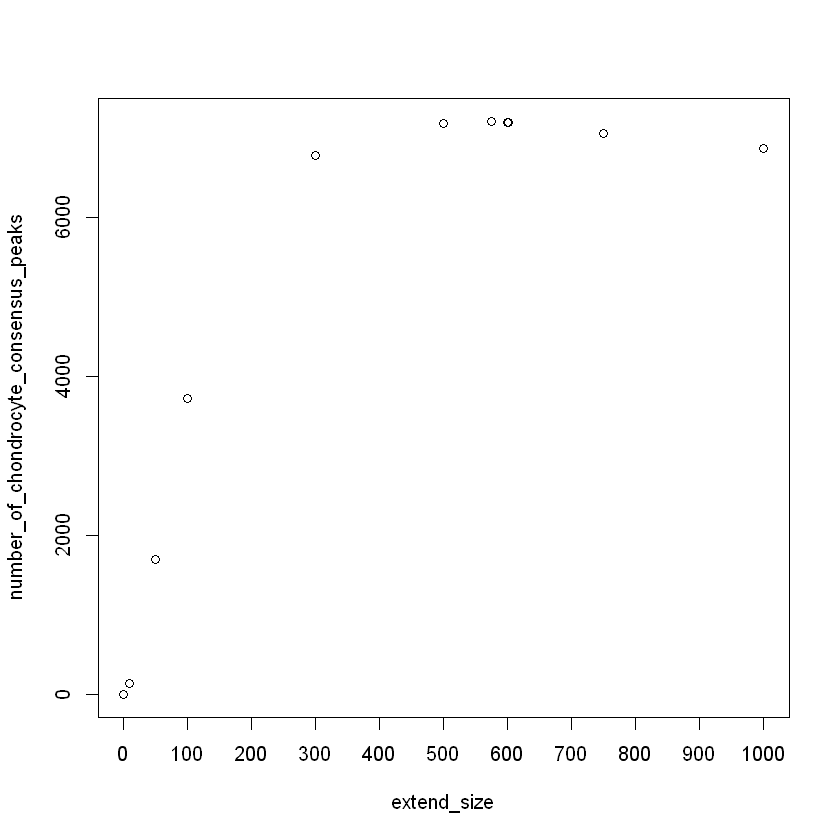

In [35]:
## the plot shows that at certain extendingSize values the number of consensus peaks
####obtained start to plateau. here we choose the consensus peaks derived from an
####extending size of 575 because there seems to be a drop in the number of
####consensus peaks when extendingSize is changed to 600
plot(extend_size,number_of_chondrocyte_consensus_peaks)
axis(side=1, at=seq(0,1000,by=100))

In [36]:
## export the consensus calls as *.bed to view in IGV
export(chondrocyte_consensus_extend575[["consensusRanges"]], con='D:/mouse_chondrocyte_chip_seq_macs2/chondrocyte_consensus_peaks_extend575.bed')